In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-por-degrees/student-por.csv


In [2]:
df=pd.read_csv("/kaggle/input/student-por-degrees/student-por.csv", sep=";")


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [4]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [5]:
df.duplicated().sum()

0

no null values

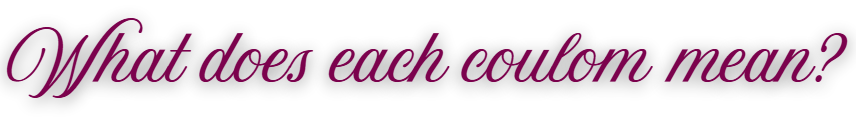

*REPORT*

school: student's school (GP = Gabriel Pereira, MS = Mousinho da Silveira).

sex: student's sex (F = female, M = male).

age: student's age (15 to 22).

address: home address (U = urban, R = rural).

famsize: family size (LE3 = ≤3, GT3 = >3).

Pstatus: parent’s cohabitation status (T = living together, A = apart).

Medu: mother’s education (0 = none, 1 = primary, 2 = 5th–9th, 3 = secondary, 4 = higher).

Fedu: father’s education (0 = none, 1 = primary, 2 = 5th–9th, 3 = secondary, 4 = higher) .

Mjob, Fjob: mother’s/father’s job (teacher, health, services, at_home, other).

studytime: weekly study time (1 = <2h, 2 = 2–5h, 3 = 5–10h, 4 = >10h).

failures: number of past class failures (n if 1<=n<3, else 4).

schoolsup: extra educational support (yes/no).

famsup: family educational support (yes/no).

paid: extra paid classes within the course subject (yes/no).

activities: extra-curricular activities (yes/no).

higher: wants to take higher education (yes/no).

internet: Internet access at home (yes/no).

romantic: with a romantic relationship (yes/no).

famrel: quality of family relationships (1 = very bad to 5 = excellent).

freetime: free time after school (1 = very low to 5 = very high).

goout: going out with friends (1 = very low to 5 = very high).

Dalc: workday alcohol consumption (1–5).

Walc: weekend alcohol consumption (1–5).

health: current health status (1–5).

absences: number of school absences (0 to 93).

G1, G2, G3: grades (first period, second period, final).

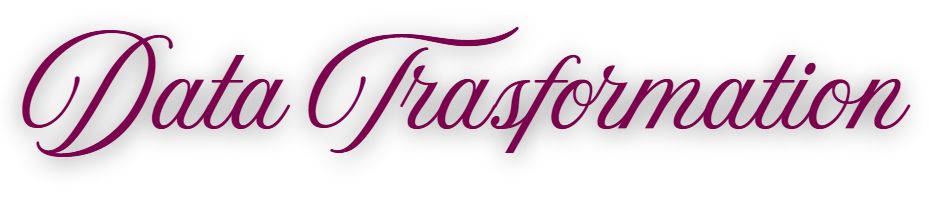

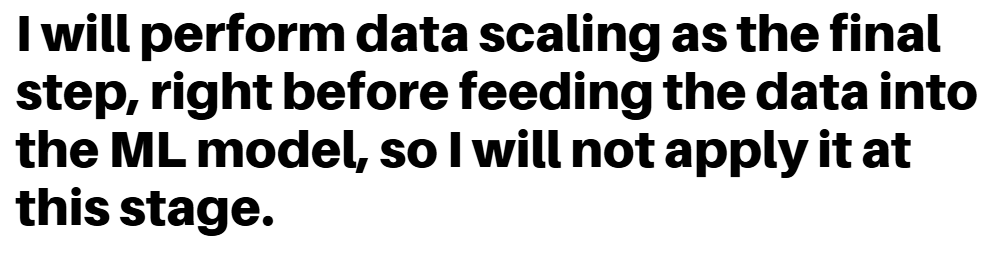

In [6]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [8]:
# binary yes/no
binary_yesno = ['schoolsup','famsup','paid','activities','nursery',
                'higher','internet','romantic']
for col in binary_yesno:
    df[col] = df[col].map({'no':0, 'yes':1})

# school, sex, address, famsize, Pstatus
df['school'] = df['school'].map({'GP':0 , 'MS':1})
df['sex'] = df['sex'].map({'F':0 , 'M':1})
df['address'] = df['address'].map({'U':0 , 'R':1})
df['famsize'] = df['famsize'].map({'LE3':0 , 'GT3':1})
df['Pstatus'] = df['Pstatus'].map({'T':0 , 'A':1})

In [9]:
#Multi-category
df = pd.get_dummies(df, columns=['Mjob','Fjob','reason','guardian'], drop_first=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   school             649 non-null    int64
 1   sex                649 non-null    int64
 2   age                649 non-null    int64
 3   address            649 non-null    int64
 4   famsize            649 non-null    int64
 5   Pstatus            649 non-null    int64
 6   Medu               649 non-null    int64
 7   Fedu               649 non-null    int64
 8   traveltime         649 non-null    int64
 9   studytime          649 non-null    int64
 10  failures           649 non-null    int64
 11  schoolsup          649 non-null    int64
 12  famsup             649 non-null    int64
 13  paid               649 non-null    int64
 14  activities         649 non-null    int64
 15  nursery            649 non-null    int64
 16  higher             649 non-null    int64
 17  internet        

In [11]:
df = df.astype(int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   school             649 non-null    int64
 1   sex                649 non-null    int64
 2   age                649 non-null    int64
 3   address            649 non-null    int64
 4   famsize            649 non-null    int64
 5   Pstatus            649 non-null    int64
 6   Medu               649 non-null    int64
 7   Fedu               649 non-null    int64
 8   traveltime         649 non-null    int64
 9   studytime          649 non-null    int64
 10  failures           649 non-null    int64
 11  schoolsup          649 non-null    int64
 12  famsup             649 non-null    int64
 13  paid               649 non-null    int64
 14  activities         649 non-null    int64
 15  nursery            649 non-null    int64
 16  higher             649 non-null    int64
 17  internet        

In [13]:
print(df['absences'].min())
print(df['absences'].max())
print("#"*50)
print(df['absences'].value_counts())

0
32
##################################################
absences
0     244
2     110
4      93
6      49
8      42
10     21
1      12
12     12
5      12
16     10
14      8
9       7
3       7
11      5
18      3
7       3
21      2
15      2
22      2
30      1
26      1
24      1
13      1
32      1
Name: count, dtype: int64


In [14]:
#feature engineering

# Feature 1: Average grade
df["avg_grade"] = df[["G1", "G2", "G3"]].mean(axis=1)

# Feature 2: Parent education (average of mother & father education)
df["parent_edu"] = df[["Medu", "Fedu"]].mean(axis=1)

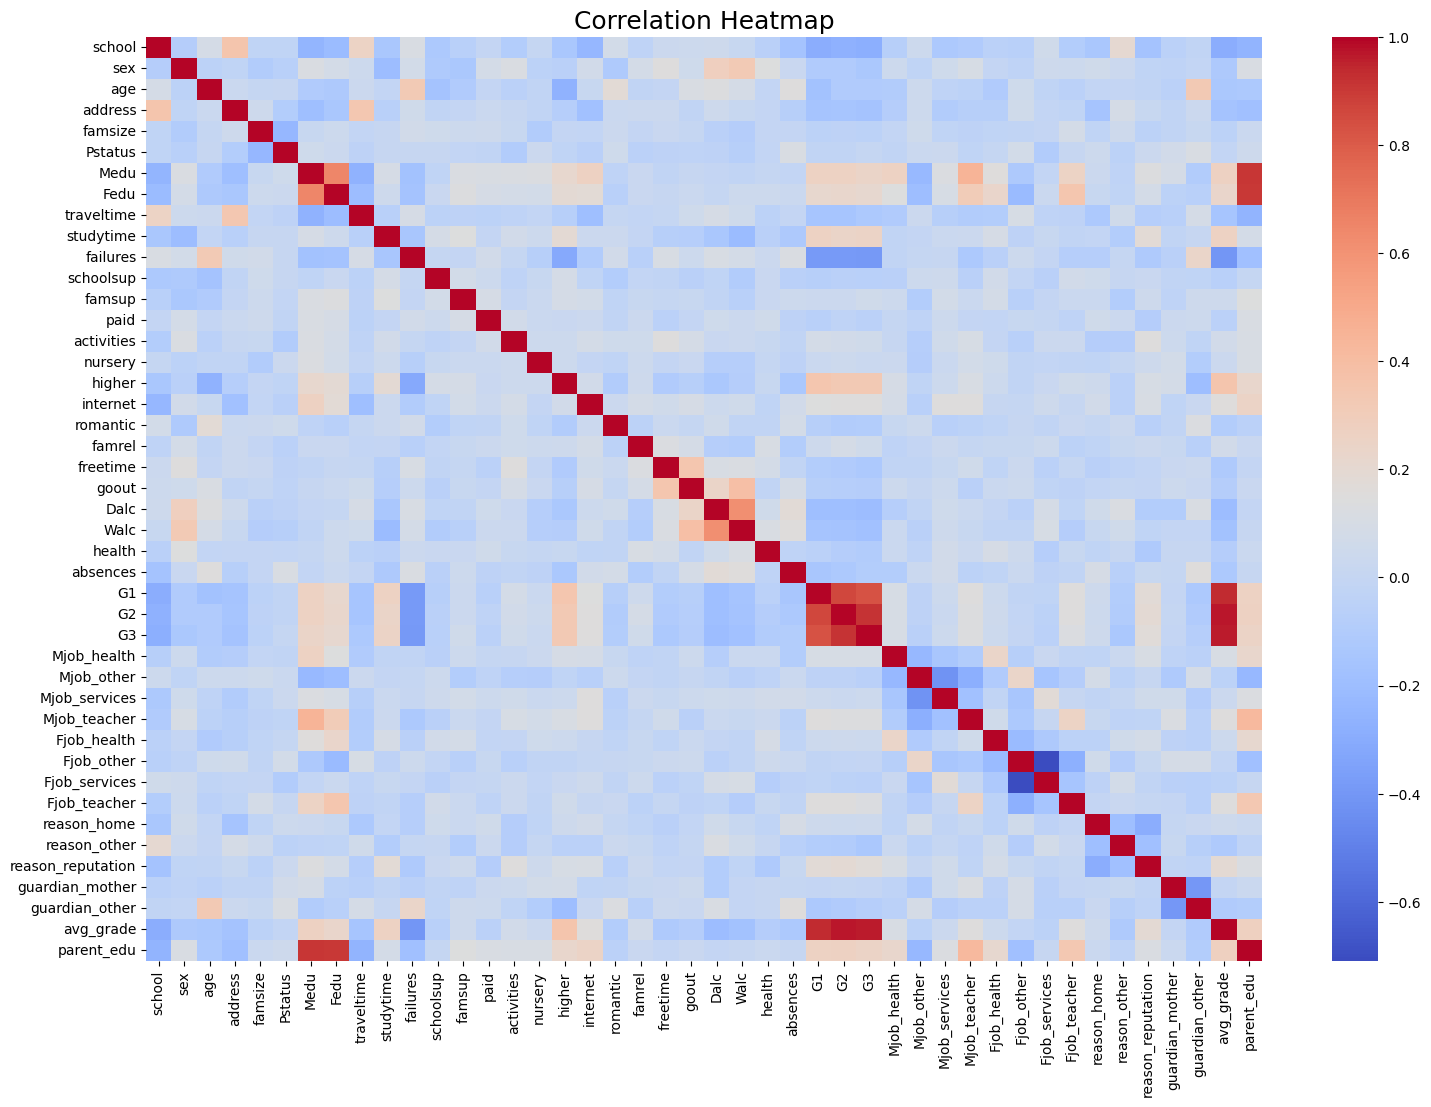

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr()


plt.figure(figsize=(18,12))
sns.heatmap(corr, annot=False, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap", fontsize=18)
plt.show()

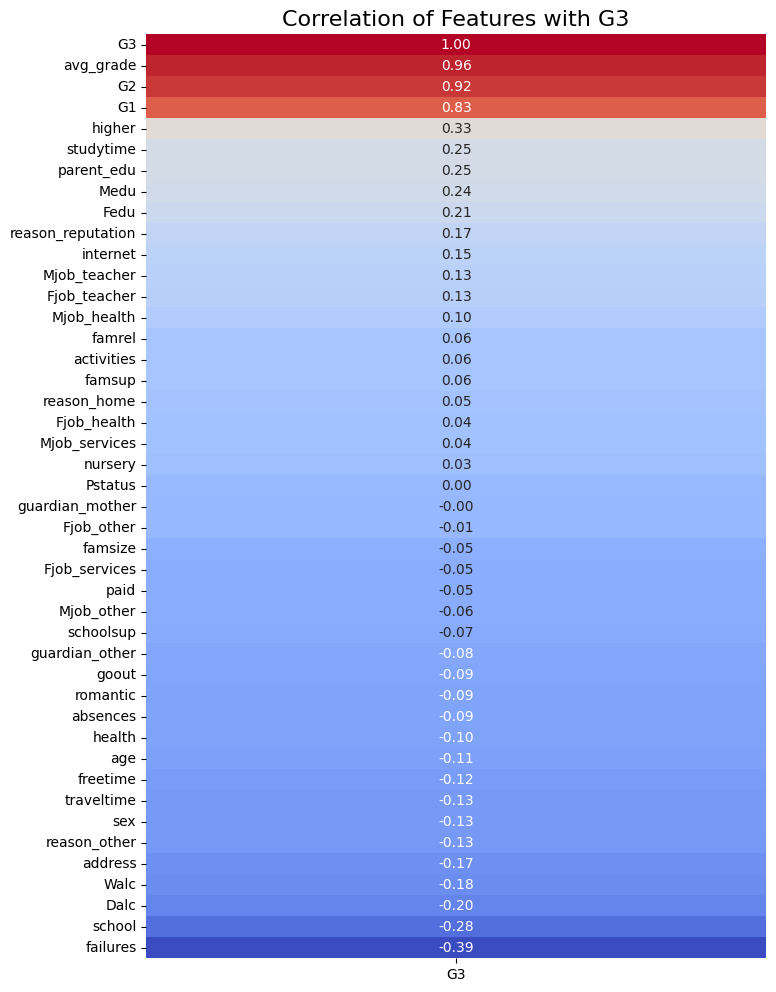

In [16]:
g3_corr = df.corr()['G3'].sort_values(ascending=False)

plt.figure(figsize=(8,12))
sns.heatmap(g3_corr.to_frame(), annot=True, fmt=".2f", cmap="coolwarm", cbar=False)
plt.title("Correlation of Features with G3", fontsize=16)
plt.show()

In [17]:
df_sv = df.copy()


corr_with_G3 = df.corr()["G3"]


important_features = corr_with_G3[abs(corr_with_G3) > 0.2].index


df_sv = df[important_features]


unsv_features = ["studytime", "absences", "goout", "freetime", "famsup", "schoolsup"]

df_unsv = df[unsv_features].copy()

In [18]:
df_sv.columns

Index(['school', 'Medu', 'Fedu', 'studytime', 'failures', 'higher', 'Dalc',
       'G1', 'G2', 'G3', 'avg_grade', 'parent_edu'],
      dtype='object')

In [19]:
df_unsv.columns

Index(['studytime', 'absences', 'goout', 'freetime', 'famsup', 'schoolsup'], dtype='object')

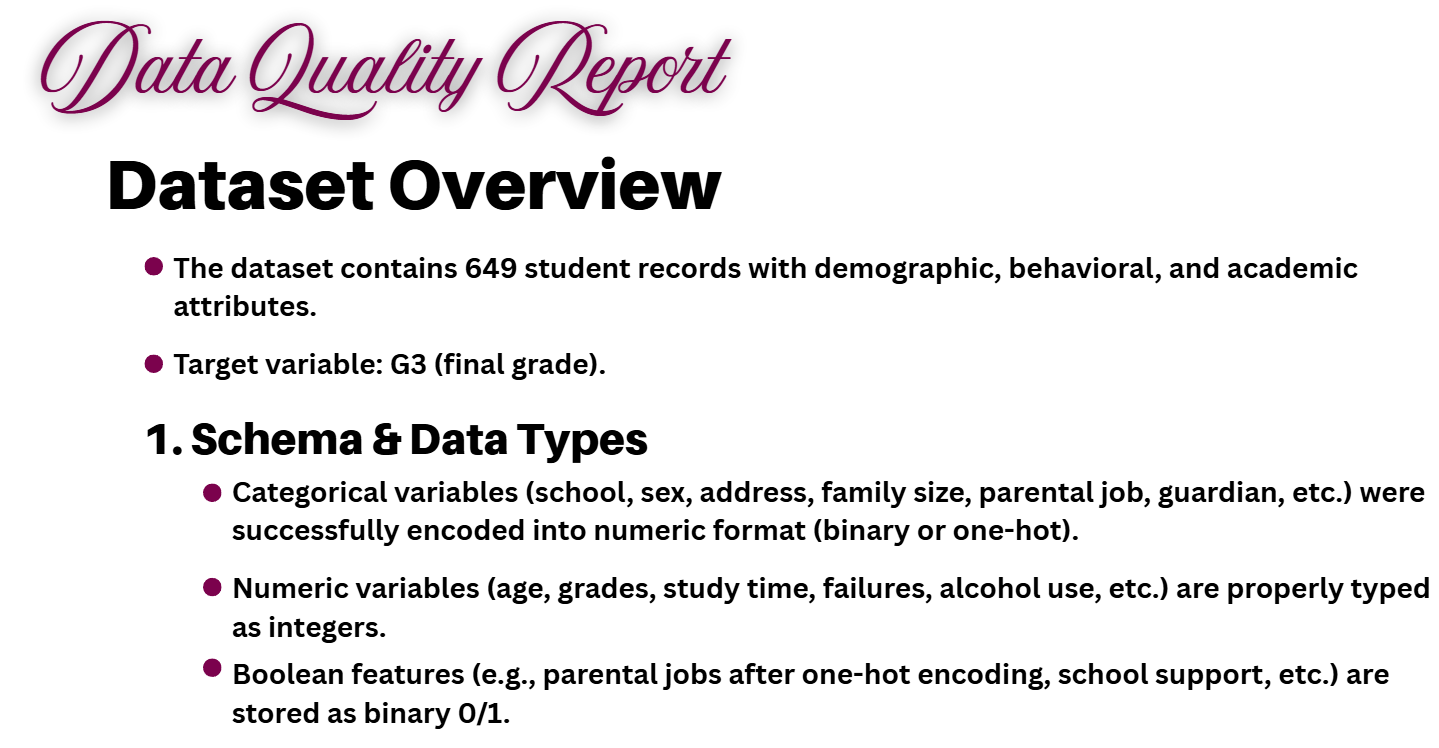

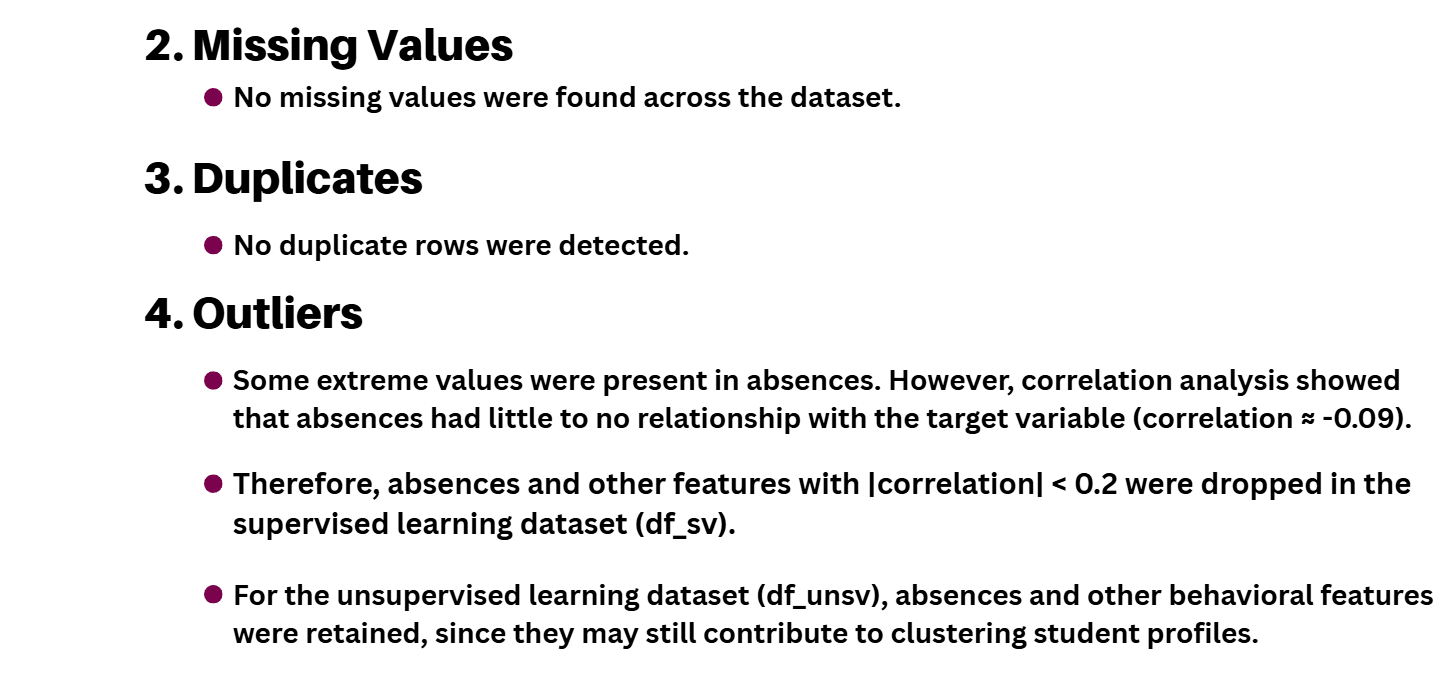

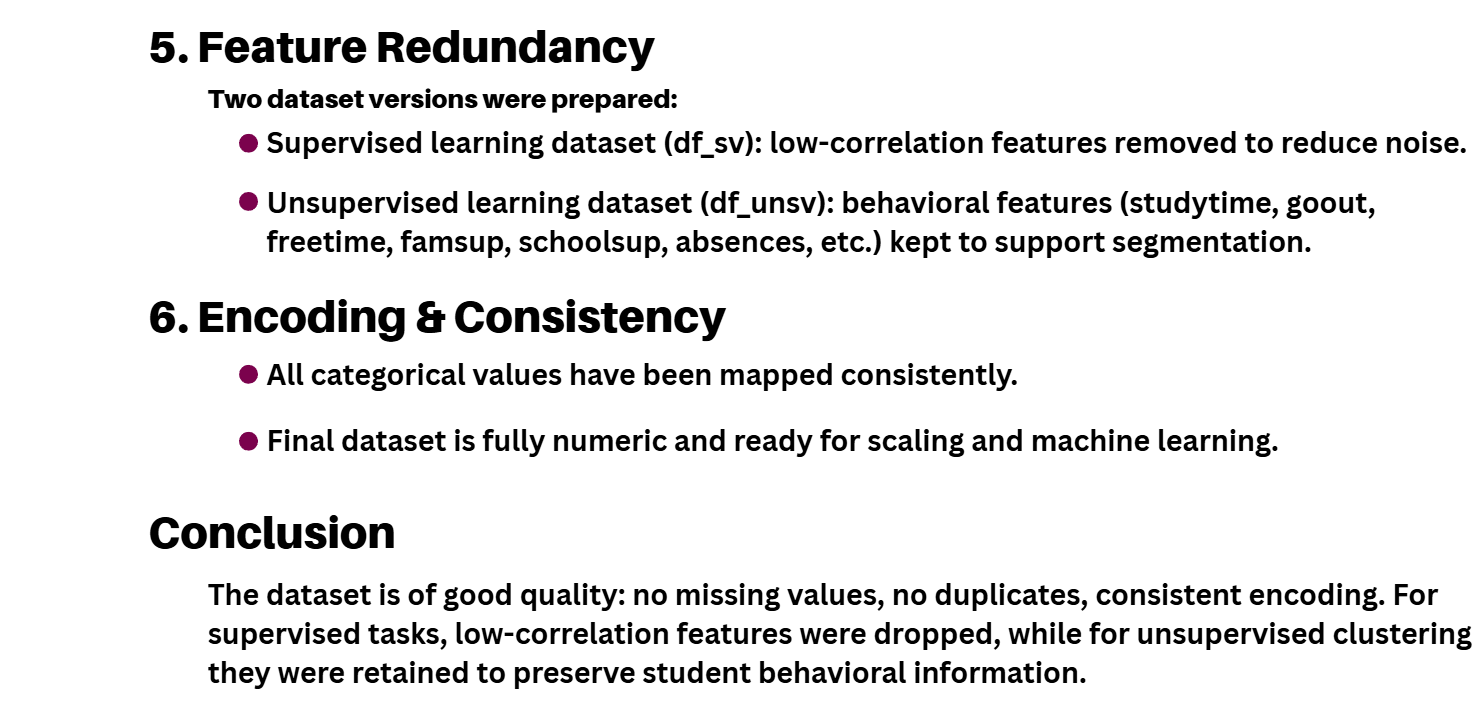

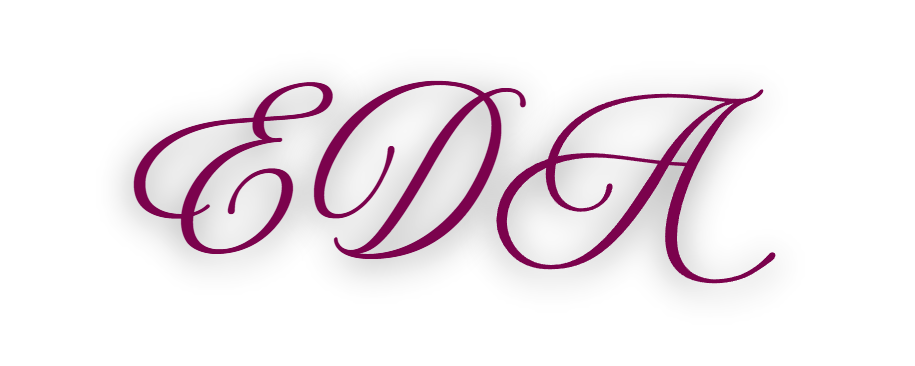

In [20]:
# Descriptive stats table
df[['age', 'studytime', 'failures', 'absences', 'G1', 'G2', 'G3']].describe()

,age,studytime,failures,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,1.930663,0.221880,3.659476,11.399076,11.570108,11.906009
std,1.218138,0.829510,0.593235,4.640759,2.745265,2.913639,3.230656
min,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,1.000000,0.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,0.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,2.000000,0.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,3.000000,32.000000,19.000000,19.000000,19.000000


In [21]:
# Group comparison: studytime vs G3
df.groupby('studytime')['G3'].mean()

studytime
1    10.844340
2    12.091803
3    13.226804
4    13.057143
Name: G3, dtype: float64

In [22]:
# Group comparison: failures vs G3
df.groupby('failures')['G3'].mean()

failures
0    12.510018
1     8.642857
2     8.812500
3     8.071429
Name: G3, dtype: float64

In [23]:
# Group comparison: schoolsup vs G3
df.groupby('schoolsup')['G3'].mean()

schoolsup
0    11.979346
1    11.279412
Name: G3, dtype: float64

In [24]:
# Hypothesis 1: studytime effect on G3
df.groupby('studytime')['G3'].mean()

studytime
1    10.844340
2    12.091803
3    13.226804
4    13.057143
Name: G3, dtype: float64

In [25]:
# Hypothesis 2: failures effect on G3
df.groupby('failures')['G3'].mean()

failures
0    12.510018
1     8.642857
2     8.812500
3     8.071429
Name: G3, dtype: float64

In [26]:
# Hypothesis 3: schoolsup effect on G3
df.groupby('schoolsup')['G3'].mean()

schoolsup
0    11.979346
1    11.279412
Name: G3, dtype: float64

In [27]:
# Hypothesis 4: sex effect on G3
df.groupby('sex')['G3'].mean()

sex
0    12.253264
1    11.406015
Name: G3, dtype: float64

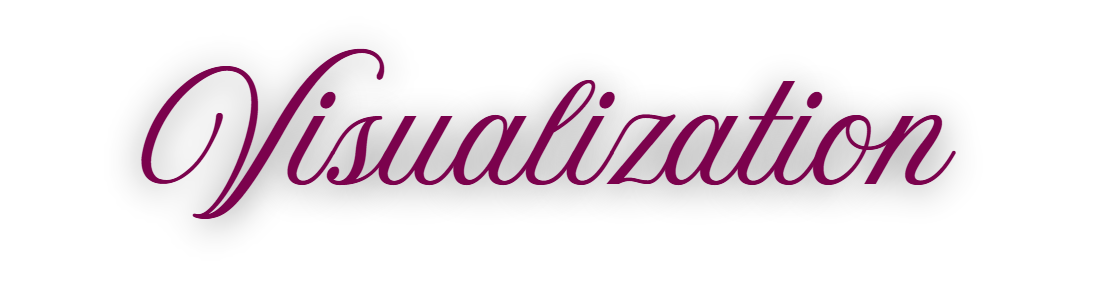

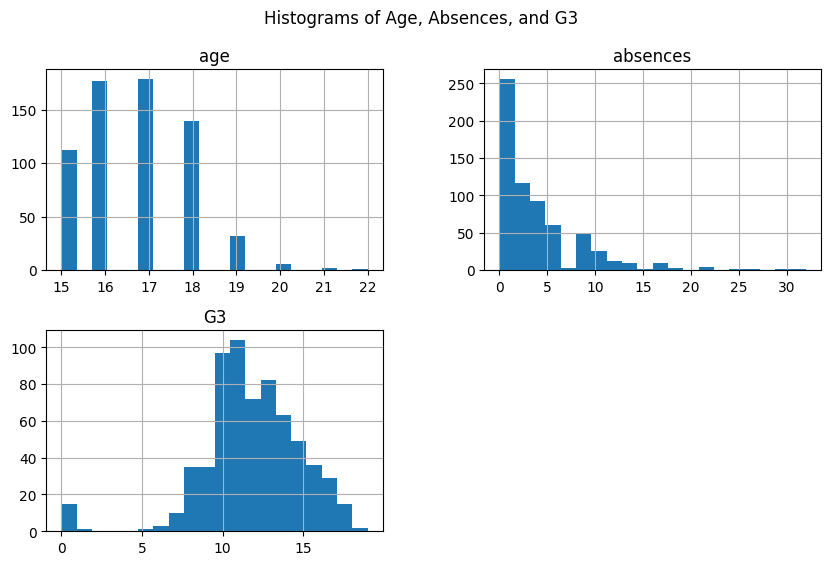

In [28]:
# Histograms of some numeric variables
df[['age', 'absences', 'G3']].hist(bins=20, figsize=(10,6))
plt.suptitle("Histograms of Age, Absences, and G3")
plt.show()

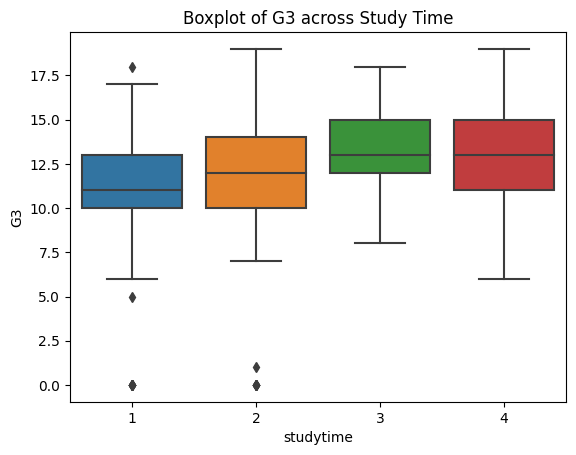

In [29]:
# Boxplot of G3 across studytime
sns.boxplot(x='studytime', y='G3', data=df)
plt.title("Boxplot of G3 across Study Time")
plt.show()

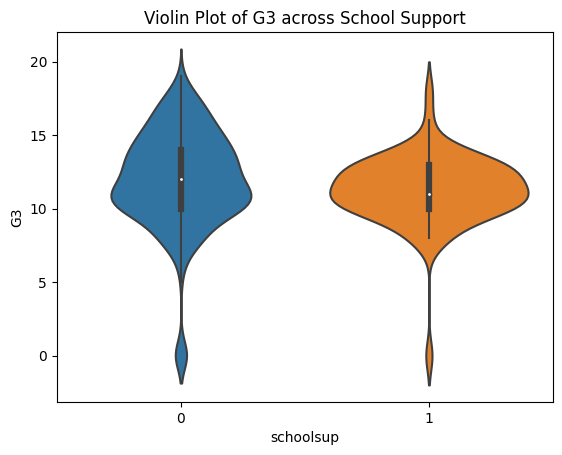

In [30]:
# Violin plot of G3 across schoolsup
sns.violinplot(x='schoolsup', y='G3', data=df)
plt.title("Violin Plot of G3 across School Support")
plt.show()

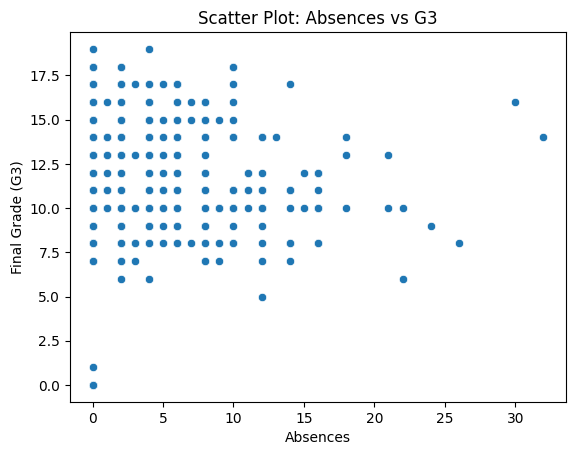

In [31]:
# Scatter plot of absences vs G3
sns.scatterplot(x='absences', y='G3', data=df)
plt.title("Scatter Plot: Absences vs G3")
plt.xlabel("Absences")
plt.ylabel("Final Grade (G3)")
plt.show()

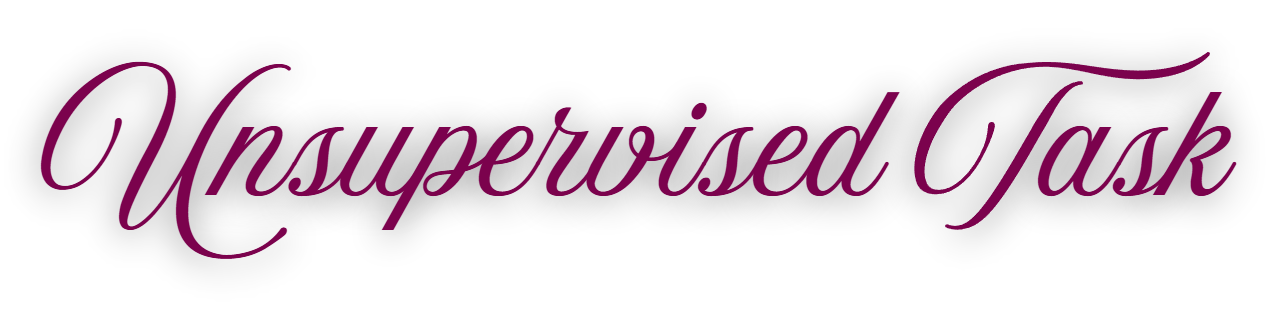

In [32]:
df_unsv.columns

Index(['studytime', 'absences', 'goout', 'freetime', 'famsup', 'schoolsup'], dtype='object')

In [33]:
from sklearn.preprocessing import StandardScaler

# features that need scaling
features_to_scale = ['absences', 'studytime', 'freetime', 'goout']

# copy df_unsv to keep all features
x_unsv = df_unsv.copy()

# apply scaling on selected features
scaler = StandardScaler()
x_unsv[features_to_scale] = scaler.fit_transform(df_unsv[features_to_scale])

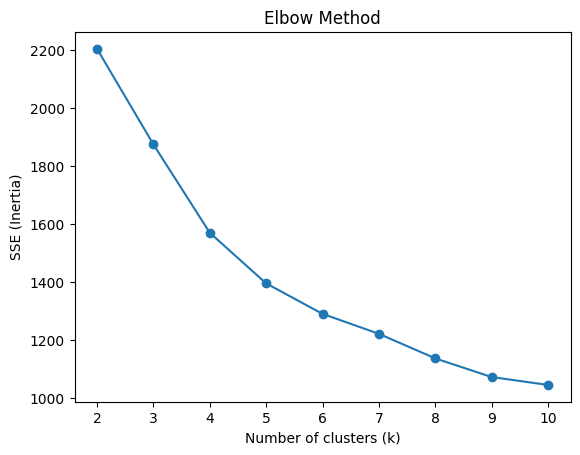

In [34]:
# Elbow Method
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(x_unsv)
    sse.append(kmeans.inertia_)

plt.plot(k_range, sse, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("SSE (Inertia)")
plt.title("Elbow Method")
plt.show()

so i will use K=4

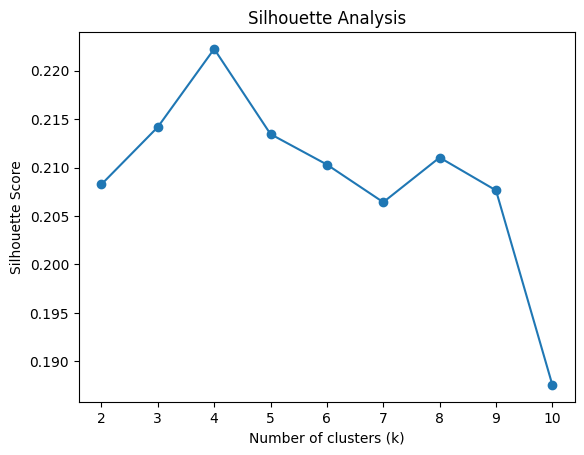

In [35]:
# Silhouette scores
from sklearn.metrics import silhouette_score

sil_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(x_unsv)
    sil_scores.append(silhouette_score(x_unsv, labels))

plt.plot(k_range, sil_scores, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")
plt.show()

Confirmation of information (K=4)

In [36]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(x_unsv)

In [37]:
# Cluster sizes
print(df['Cluster'].value_counts())

Cluster
1    228
0    213
3    122
2     86
Name: count, dtype: int64


Cluster
0    11.314554
1    12.043860
2    11.104651
3    13.245902
Name: G3, dtype: float64


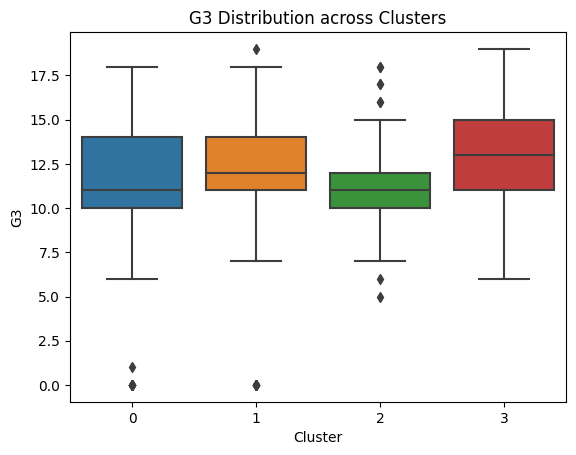

In [38]:
# Average G3 by cluster
cluster_g3 = df.groupby('Cluster')['G3'].mean()
print(cluster_g3)

# Boxplot for visualization
sns.boxplot(x='Cluster', y='G3', data=df)
plt.title("G3 Distribution across Clusters")
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


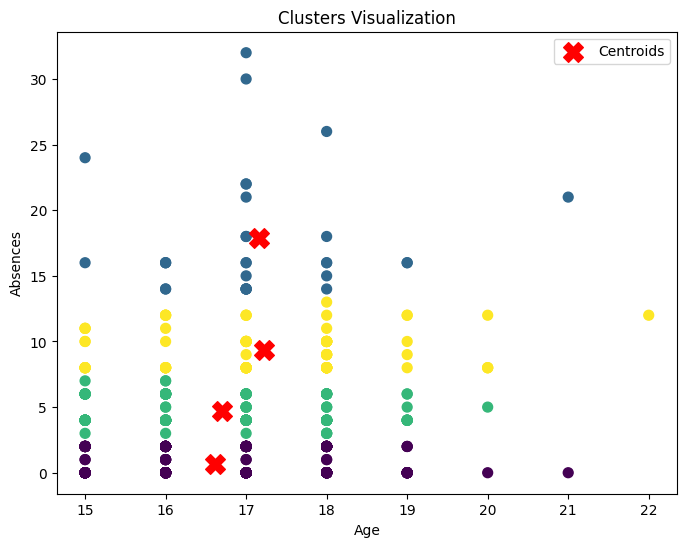

In [39]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Fit KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(df[['age', 'absences']])

# Visualization
plt.figure(figsize=(8,6))
plt.scatter(df['age'], df['absences'], c=df['cluster'], cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel("Age")
plt.ylabel("Absences")
plt.title("Clusters Visualization")
plt.legend()
plt.show()

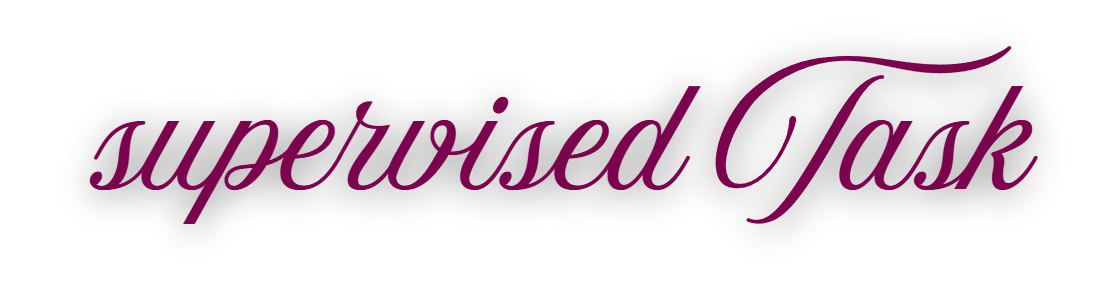

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler

In [41]:
df_sv.columns

Index(['school', 'Medu', 'Fedu', 'studytime', 'failures', 'higher', 'Dalc',
       'G1', 'G2', 'G3', 'avg_grade', 'parent_edu'],
      dtype='object')

In [42]:
features_to_scale = ['Medu', 'Fedu', 'studytime', 'failures', 'Dalc', 'G1', 'G2', 'avg_grade', 'parent_edu']
binary_keep_as_is = ['school', 'higher'] 
target_col = 'G3'

In [43]:
x_with = df_sv.drop(columns=[target_col])
y = df_sv[target_col]
x_without = df_sv.drop(columns=[target_col, 'G1', 'G2', 'avg_grade'], errors='ignore')

In [44]:
from sklearn.model_selection import train_test_split

x_train_with, x_test_with, y_train_with, y_test_with = train_test_split(
    x_with, y, test_size=0.2, random_state=42
)

x_train_without, x_test_without, y_train_without, y_test_without = train_test_split(
    x_without, y, test_size=0.2, random_state=42
)

print("Shapes with G1/G2:", x_train_with.shape, x_test_with.shape)
print("Shapes without G1/G2:", x_train_without.shape, x_test_without.shape)

Shapes with G1/G2: (519, 11) (130, 11)
Shapes without G1/G2: (519, 8) (130, 8)


In [45]:
from sklearn.preprocessing import StandardScaler

scaler_with = StandardScaler()

scale_cols_with = [c for c in features_to_scale if c in x_train_with.columns]

x_train_with_scaled = x_train_with.copy()
x_test_with_scaled  = x_test_with.copy()

x_train_with_scaled[scale_cols_with] = scaler_with.fit_transform(x_train_with[scale_cols_with])
x_test_with_scaled[scale_cols_with]  = scaler_with.transform(x_test_with[scale_cols_with])

print("Scaled (Variant 1) columns:", scale_cols_with)

Scaled (Variant 1) columns: ['Medu', 'Fedu', 'studytime', 'failures', 'Dalc', 'G1', 'G2', 'avg_grade', 'parent_edu']


In [46]:
models = {
    "LogReg": LogisticRegression(max_iter=200),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

def evaluate_models(x_train, x_test, y_train, y_test):
    results = {}
    for name, model in models.items():
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        results[name] = {
            "Accuracy": accuracy_score(y_test, y_pred),
            "Precision": precision_score(y_test, y_pred, average="weighted"),
            "Recall": recall_score(y_test, y_pred, average="weighted"),
            "F1": f1_score(y_test, y_pred, average="weighted")
        }
    return pd.DataFrame(results).T

In [47]:
scaler_without = StandardScaler()

scale_cols_without = [c for c in features_to_scale if c in x_train_without.columns]

x_train_without_scaled = x_train_without.copy()
x_test_without_scaled  = x_test_without.copy()

x_train_without_scaled[scale_cols_without] = scaler_without.fit_transform(x_train_without[scale_cols_without])
x_test_without_scaled[scale_cols_without]  = scaler_without.transform(x_test_without[scale_cols_without])

print("Scaled (Variant 2) columns:", scale_cols_without)

Scaled (Variant 2) columns: ['Medu', 'Fedu', 'studytime', 'failures', 'Dalc', 'parent_edu']


In [48]:
results_with = evaluate_models(x_train_with_scaled, x_test_with_scaled, y_train_with, y_test_with)
results_with["Dataset"] = "With G1,G2"
results_with

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Accuracy,Precision,Recall,F1,Dataset
LogReg,0.446154,0.476253,0.446154,0.446367,"With G1,G2"
DecisionTree,0.676923,0.709886,0.676923,0.684688,"With G1,G2"
RandomForest,0.646154,0.676539,0.646154,0.638401,"With G1,G2"
SVM,0.407692,0.445608,0.407692,0.386490,"With G1,G2"


In [49]:
results_without = evaluate_models(x_train_without_scaled, x_test_without_scaled, y_train_without, y_test_without)
results_without["Dataset"] = "Without G1,G2"
results_without

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precis

,Accuracy,Precision,Recall,F1,Dataset
LogReg,0.161538,0.173930,0.161538,0.138252,"Without G1,G2"
DecisionTree,0.169231,0.159314,0.169231,0.157127,"Without G1,G2"
RandomForest,0.161538,0.159349,0.161538,0.151164,"Without G1,G2"
SVM,0.138462,0.080420,0.138462,0.090890,"Without G1,G2"


In [50]:
all_results = pd.concat([results_with, results_without])
all_results

,Accuracy,Precision,Recall,F1,Dataset
LogReg,0.446154,0.476253,0.446154,0.446367,"With G1,G2"
DecisionTree,0.676923,0.709886,0.676923,0.684688,"With G1,G2"
RandomForest,0.646154,0.676539,0.646154,0.638401,"With G1,G2"
SVM,0.407692,0.445608,0.407692,0.386490,"With G1,G2"
LogReg,0.161538,0.173930,0.161538,0.138252,"Without G1,G2"
DecisionTree,0.169231,0.159314,0.169231,0.157127,"Without G1,G2"
RandomForest,0.161538,0.159349,0.161538,0.151164,"Without G1,G2"
SVM,0.138462,0.080420,0.138462,0.090890,"Without G1,G2"


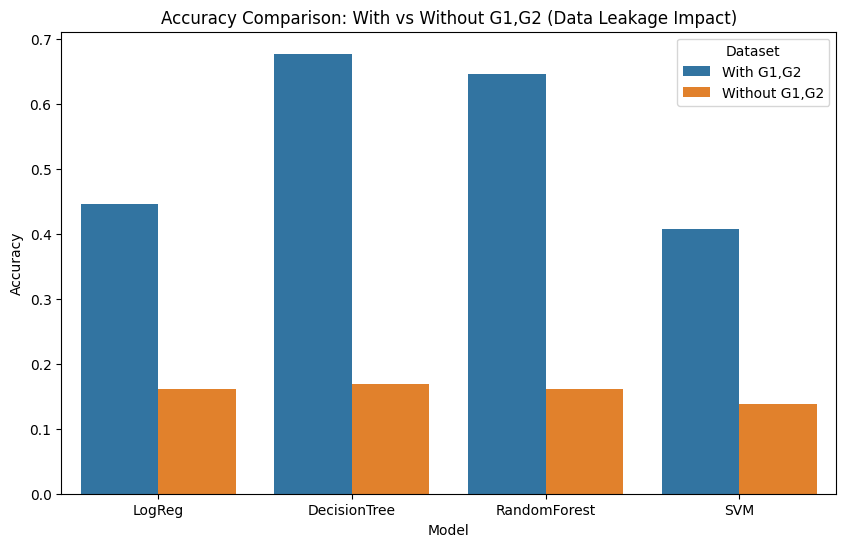

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(
    data=all_results.reset_index(),
    x="index", y="Accuracy", hue="Dataset"
)
plt.title("Accuracy Comparison: With vs Without G1,G2 (Data Leakage Impact)")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()

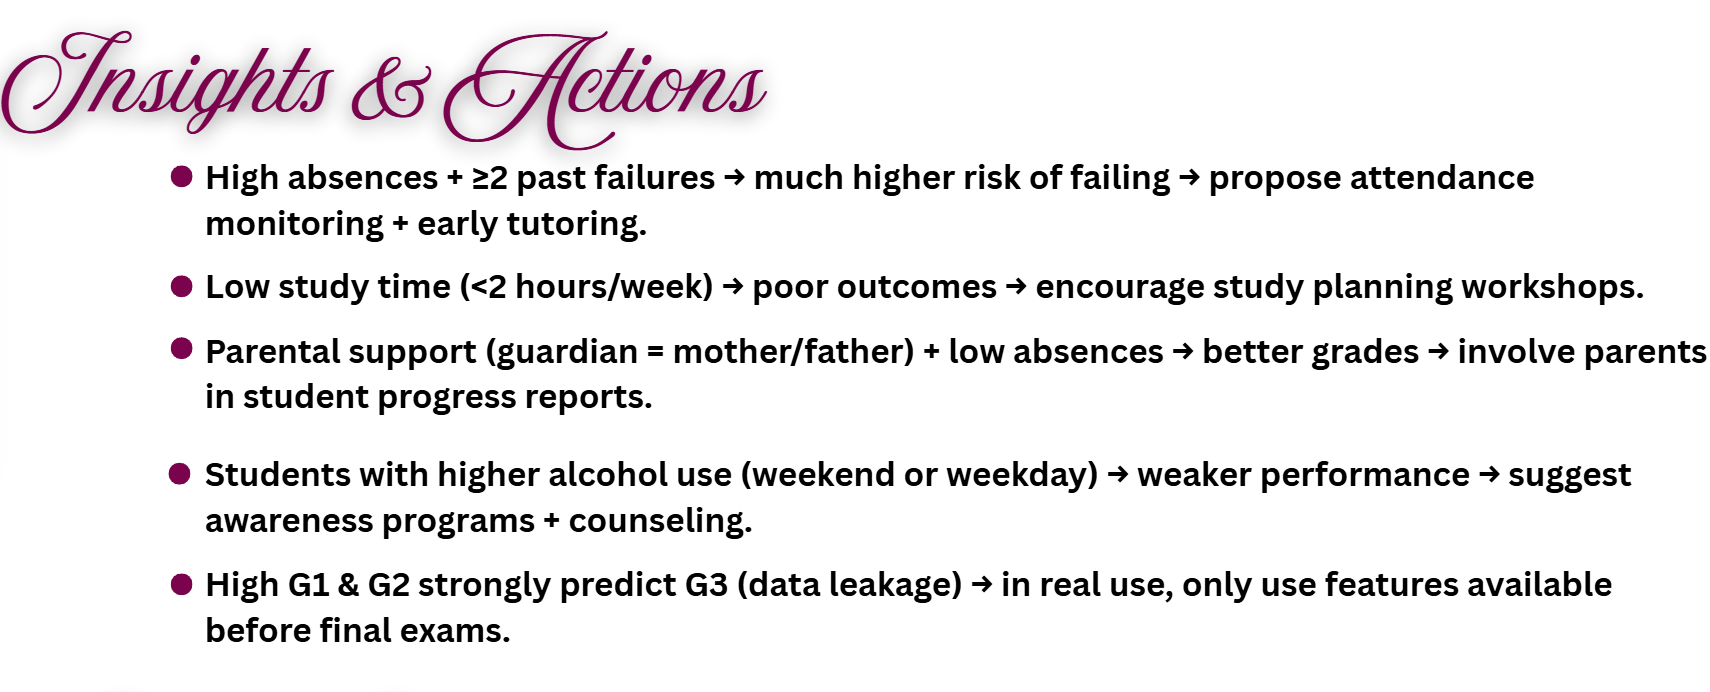

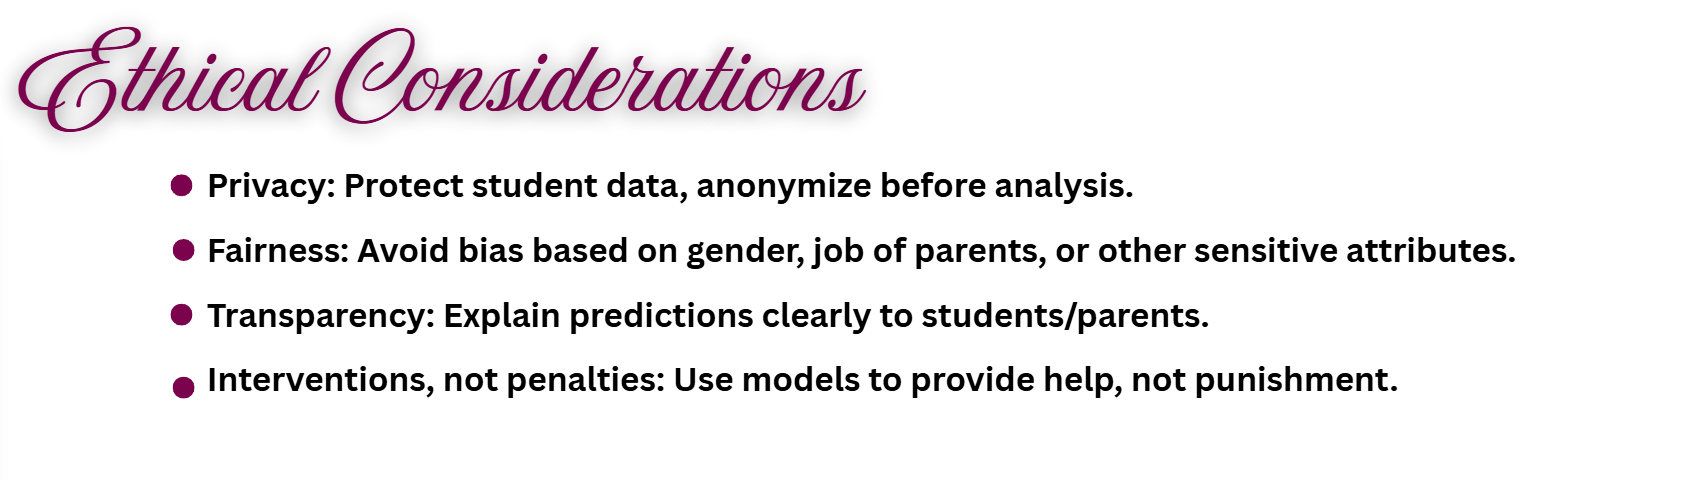